# 1 Notebook setup

## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import tree, metrics, preprocessing
from IPython import display
from category_encoders import ordinal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 2 Load data

We start by importing the sample dataset and getting familiar with the basic content

In [2]:
# Base training set for benchmarking
base_train = pd.read_csv('nursery_dataset and R code/original_training_set_no_na.csv', usecols=lambda x: x != "Unnamed: 0")

# Base testing set to be used across all datasets
base_test = pd.read_csv('nursery_dataset and R code/original_testing_set_no_na.csv', usecols=lambda x: x != "Unnamed: 0")

# Baseline mode imputation datasets
mode_10 = pd.read_csv('nursery_dataset and R code/mode_imputation_10.csv', usecols=lambda x: x != "Unnamed: 0")
mode_40 = pd.read_csv('nursery_dataset and R code/mode_imputation_40.csv', usecols=lambda x: x != "Unnamed: 0")
mode_70 = pd.read_csv('nursery_dataset and R code/mode_imputation_70.csv', usecols=lambda x: x != "Unnamed: 0")

# Naive Bayes imputation datasets
nb_10 = pd.read_csv('nursery_dataset and R code/nb_imputation_10.csv', usecols=lambda x: x != "Unnamed: 0")
nb_40 = pd.read_csv('nursery_dataset and R code/nb_imputation_40.csv', usecols=lambda x: x != "Unnamed: 0")
nb_70 = pd.read_csv('nursery_dataset and R code/nb_imputation_70.csv', usecols=lambda x: x != "Unnamed: 0")

Check that all the data has been loaded successfully

In [3]:
tables_list = [base_train, base_test, mode_10, mode_40, mode_70, nb_10, nb_40, nb_70]
for table in tables_list:
    display.display(table.head())

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,3,convenient,convenient,nonprob,recommended,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,spec_prior
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,completed,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
3,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority
4,usual,proper,complete,1,convenient,inconv,slightly_prob,recommended,very_recom


,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,proper,complete,3,convenient,convenient,nonprob,priority,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,priority
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,incomplete,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,critical,completed,3,critical,convenient,slightly_prob,recommended,very_recom
1,pretentious,critical,completed,3,critical,inconv,slightly_prob,priority,not_recom
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,priority,priority
4,pretentious,critical,completed,3,less_conv,convenient,slightly_prob,priority,not_recom


,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,very_crit,complete,more,convenient,inconv,nonprob,priority,priority
1,pretentious,very_crit,complete,more,less_conv,inconv,nonprob,priority,priority
2,pretentious,very_crit,complete,more,less_conv,convenient,slightly_prob,not_recom,priority
3,pretentious,very_crit,complete,more,less_conv,inconv,slightly_prob,priority,priority
4,pretentious,critical,complete,more,less_conv,inconv,problematic,priority,priority


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,3,convenient,convenient,nonprob,recommended,very_recom
1,usual,critical,completed,1,critical,inconv,nonprob,priority,spec_prior
2,pretentious,improper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,foster,3,critical,inconv,slightly_prob,recommended,priority
4,pretentious,critical,foster,more,less_conv,inconv,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,incomplete,2,convenient,convenient,nonprob,recommended,very_recom
1,usual,proper,incomplete,2,critical,inconv,problematic,priority,priority
2,pretentious,improper,complete,2,convenient,inconv,nonprob,not_recom,not_recom
3,usual,proper,foster,1,convenient,inconv,slightly_prob,priority,priority
4,great_pret,very_crit,completed,more,less_conv,convenient,problematic,priority,spec_prior


,parents,has_nurs,form,children,housing,finance,social,health,class
0,great_pret,improper,completed,more,convenient,inconv,nonprob,recommended,recommended
1,great_pret,improper,complete,more,critical,inconv,nonprob,recommended,recommended
2,pretentious,critical,incomplete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,usual,proper,complete,2,convenient,inconv,problematic,recommended,priority
4,pretentious,critical,incomplete,3,critical,inconv,problematic,not_recom,not_recom


In [4]:
for table in tables_list:
    table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   9072 non-null   object
 1   has_nurs  9072 non-null   object
 2   form      9072 non-null   object
 3   children  9072 non-null   object
 4   housing   9072 non-null   object
 5   finance   9072 non-null   object
 6   social    9072 non-null   object
 7   health    9072 non-null   object
 8   class     9072 non-null   object
dtypes: object(9)
memory usage: 638.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   3888 non-null   object
 1   has_nurs  3888 non-null   object
 2   form      3888 non-null   object
 3   children  3888 non-null   object
 4   housing   3888 non-null   object
 5   finance   3888 non-null   object
 6   social    3888 non-

Categorical values need to be encoded for the `DecisionTreeClassifier` in scikit-learn.

In [5]:
# Check column labels
for col in nb_40.columns:
    print(col, ':', nb_40[col].unique())

parents : ['usual' 'pretentious' 'great_pret']
has_nurs : ['proper' 'improper' 'very_crit' 'critical' 'less_proper']
form : ['incomplete' 'complete' 'foster' 'completed']
children : ['2' '1' 'more' '3']
housing : ['convenient' 'critical' 'less_conv']
finance : ['convenient' 'inconv']
social : ['nonprob' 'problematic' 'slightly_prob']
health : ['recommended' 'priority' 'not_recom']
class : ['very_recom' 'priority' 'not_recom' 'spec_prior' 'recommend']


In [6]:
# Create mappings per column
parents_mapping = {
    'great_pret': 1,
    'pretentious': 2,
    'usual': 3
}
parents_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'parents', 'mapping': parents_mapping}])

nurs_mapping = {
    'critical': 1,
    'improper': 2,
    'less_proper': 3,
    'proper': 4,
    'very_crit': 5
}
nurs_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'has_nurs', 'mapping': nurs_mapping}])

form_mapping = {
    'complete': 1,
    'completed': 2,
    'foster': 3,
    'incomplete': 4,
}
form_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'form', 'mapping': form_mapping}])

children_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    'more': 4,
}
children_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'children', 'mapping': children_mapping}])

housing_mapping = {
    'convenient': 1,
    'critical': 2,
    'less_conv': 3,
}
housing_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'housing', 'mapping': housing_mapping}])

finance_mapping = {
    'convenient': 1,
    'inconv': 2,
}
finance_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'finance', 'mapping': finance_mapping}])

social_mapping = {
    'nonprob': 1,
    'problematic': 2,
    'slightly_prob': 3
}
social_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'social', 'mapping': social_mapping}])

health_mapping = {
    'not_recom': 1,
    'priority': 2,
    'recommended': 3
}
health_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'health', 'mapping': health_mapping}])

class_mapping = {
    'not_recom': 1,
    'priority': 2,
    'recommended': 3,
    'spec_prior': 4,
    'very_recom': 5
}
class_encode = ordinal.OrdinalEncoder(mapping=[{'col': 'class', 'mapping': class_mapping}])

In [7]:
for table in tables_list:
    table[['parents']] = parents_encode.fit_transform(table[['parents']])
    table[['has_nurs']] = nurs_encode.fit_transform(table[['has_nurs']])
    table[['form']] = form_encode.fit_transform(table[['form']])
    table[['children']] = children_encode.fit_transform(table[['children']])
    table[['housing']] = housing_encode.fit_transform(table[['housing']])
    table[['finance']] = finance_encode.fit_transform(table[['finance']])
    table[['social']] = social_encode.fit_transform(table[['social']])
    table[['health']] = health_encode.fit_transform(table[['health']])

Train the base model, and use the test dataset to determine the optimal tree depth.

In [8]:
# Classification train datasets
base_train_X = base_train.drop(['class'], axis=1)
base_train_y = base_train['class']
mode_10_X = mode_10.drop(['class'], axis=1)
mode_10_y = mode_10['class']
mode_40_X = mode_40.drop(['class'], axis=1)
mode_40_y = mode_40['class']
mode_70_X = mode_70.drop(['class'], axis=1)
mode_70_y = mode_70['class']
nb_10_X = nb_10.drop(['class'], axis=1)
nb_10_y = nb_10['class']
nb_40_X = nb_40.drop(['class'], axis=1)
nb_40_y = nb_40['class']
nb_70_X = nb_70.drop(['class'], axis=1)
nb_70_y = nb_70['class']

# Classification test dataset
base_test_X = base_test.drop(['class'], axis=1)
base_test_y = base_test['class']

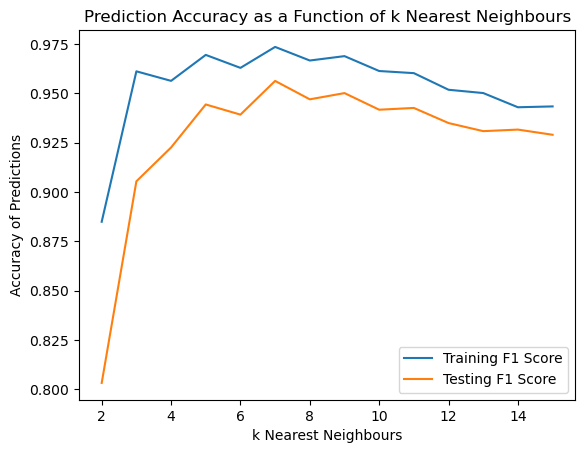

In [13]:
# Initialize lists on first iteration
train_base_f1 = []
test_base_f1 = []
k_neighbours = []

for k in range(2, 16): 

    # Train the knn wiht selected number of neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier_fit = knn.fit(base_train_X, base_train_y)

    # Make predictions with the fitted tree
    base_train_y_pred = knn_classifier_fit.predict(base_train_X)
    base_test_y_pred = knn_classifier_fit.predict(base_test_X)

    # Calculate train performance metrics
    train_base_f1.append(metrics.f1_score(base_train_y, base_train_y_pred, average='weighted', zero_division=0))

    # Calculate train performance metrics
    test_base_f1.append(metrics.f1_score(base_test_y, base_test_y_pred, average='weighted', zero_division=0))

    # Keep track of max_depth level
    k_neighbours.append(k)

plt.plot(k_neighbours, train_base_f1, label='Training F1 Score')
plt.plot(k_neighbours, test_base_f1, label='Testing F1 Score')
plt.xlabel('k Nearest Neighbours')
plt.ylabel('Accuracy of Predictions')
plt.title('Prediction Accuracy as a Function of k Nearest Neighbours')
plt.legend()
plt.show()

In [10]:
def kNN_class(train_data, test_data):
    evaluation = {}
    #train data
    features = [col for col in train_data.columns if col != 'class' and col != 'ID']
    # print(features)
    x_train = train_data[features].values.tolist()
    y_train = train_data['class'].values.tolist()
    y_train = [value.strip() for value in y_train]

    #test data
    features = [col for col in test_data.columns if col != 'class' and col != 'ID']
    # print(features)
    x_test = test_data[features].values.tolist()
    y_test = test_data['class'].values.tolist()
    y_test = [value.strip() for value in y_test]

    # Determine optimal k
    opt_k = 5

    #Set and fit model
    knn = KNeighborsClassifier(n_neighbors=opt_k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')

    evaluation = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    return evaluation


In [11]:
# Classification train datasets

# Classification test dataset
base_test

datasets = {
    'base_train': base_train,
    'mode_10': mode_10,
    'mode_40': mode_40,
    'mode_70': mode_70,
    'nb_10': nb_10,
    'nb_40': nb_40,
    'nb_70': nb_70,
}

In [12]:
# # Model and Evaluation
results_classification = []

# Define a list of classification functions along with their names
classification_model = [
    ('k-NearestNeighbour_classifier', kNN_class),
]

for dataset_name, dataset in datasets.items():
    for model_name, model in classification_model:
        try:
            results = model(dataset, base_test)
            result_dict = {'dataset_name': dataset_name, 'model': model_name, **results}
            results_classification.append(result_dict)
        except Exception as e:
            error_message = str(e).split('\n')[0]  
            print(f"Error occurred in {model_name} Classification for dataset_name {dataset_name}: {error_message}")

results_classification_df = pd.DataFrame(results_classification)
# display(results_classification_df)
results_classification_df.to_excel('knn_nb_results.xlsx', index=False)

C:\Users\sverm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
